# Capstone 2: EDA (Match Winner Predictor)

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

### Individual Player File

In [2]:
df_individual = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_individual.csv')
df_individual.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
df_individual.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
0,2020-02-27,Andersin,Thunder Logic,Station7,United States,14038,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,145.7,100.0,1.77,18,8,10,118.1,86.7,1.99,Win
1,2020-02-27,FrostayK,Station7,Thunder Logic,United States,12090,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,62.5,60.0,0.60,1,3,-2,12.3,33.3,0.14,Loss
2,2020-02-27,Inseaniac,Thunder Logic,Station7,Canada,18623,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,192.3,100.0,3.29,15,7,8,80.8,86.7,1.63,Win
3,2020-02-27,PureR,Thunder Logic,Station7,United States,10622,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,63.7,100.0,1.74,14,9,5,96.5,86.7,1.59,Win
4,2020-02-27,Sharkie,Thunder Logic,Station7,United States,19476,2339816,5151,ESEA MDL Season 33 North America,Overpass,...,58.3,100.0,1.80,10,7,3,77.9,86.7,1.41,Win


In [3]:
df_individual.shape

(130502, 33)

### Team Player File

In [4]:
df_team = pd.read_csv('C:/Users/justi/SpringboardDS/Capstone II/1.Match Winner Predictor/df_team.csv')
df_team.head()

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
0,2299001,Dignitas,2015-11-03,NiP,ESL ESEA Pro League Season 2,Train,10.2,2.0,17.8,3.8,...,78.133799,71.432949,0.596,4.8,8.6,-4.0,71.627147,67.267077,0.596,Loss
1,2299001,NiP,2015-11-03,Dignitas,ESL ESEA Pro League Season 2,Train,17.8,3.4,10.2,7.4,...,78.133799,71.432949,1.396,8.8,4.8,3.6,71.627147,67.267077,1.396,Win
2,2299003,Envy,2015-11-03,NiP,ESL ESEA Pro League Season 2,Cobblestone,16.4,4.2,19.2,6.6,...,78.133799,71.432949,0.850,8.0,9.4,-1.6,71.627147,67.267077,0.850,Loss
3,2299003,NiP,2015-11-03,Envy,ESL ESEA Pro League Season 2,Cobblestone,19.2,2.2,16.4,9.8,...,78.133799,71.432949,1.086,9.4,7.8,1.2,71.627147,67.267077,1.086,Win
4,2299011,CLG,2015-11-04,Liquid,ESL ESEA Pro League Season 2,Inferno,20.4,5.4,16.8,5.2,...,78.133799,71.432949,1.072,10.0,8.2,1.6,71.627147,67.267077,1.072,Win


In [5]:
df_team.shape

(26673, 29)

## Splitting the Data by Win/Loss

In [6]:
# Create a dataframe for individual player performance that resulted in wins.
df_individual_win = df_individual[df_individual.match_outcome == 'Win']
df_individual_win.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
40515,2018-08-29,kRYSTAL,Ghost,Natus Vincere,Germany,7218,2325741,3389,DreamHack Masters Stockholm 2018,Dust2,...,34.1,61.1,0.56,8,10,-2,41.8,72.2,0.94,Win
68831,2018-01-22,FalleN,SK,Gambit,Brazil,2023,2318620,3247,ELEAGUE Major 2018,Overpass,...,81.1,86.7,1.38,6,7,-1,84.4,63.6,1.03,Win
23837,2019-02-03,JUGi,OpTic,NoChance,Denmark,8783,2330687,4352,IEM Sydney 2019 Europe Open Qualifier 2,Inferno,...,159.3,100.0,2.60,12,7,5,77.5,86.7,1.47,Win
3222,2019-12-13,kennyS,G2,FURIA,France,7167,2338407,4998,cs_summit 5,Vertigo,...,62.5,53.3,0.90,14,5,9,93.2,86.7,1.63,Win
24949,2019-01-20,koosta,Ghost,FaZe,United States,9056,2330347,4290,iBUYPOWER Masters 2019,Train,...,57.3,64.3,0.82,12,8,4,72.5,66.7,1.35,Win


In [7]:
# Create a dataframe for individual player performance that resulted in losses.
df_individual_loss = df_individual[df_individual.match_outcome == 'Loss']
df_individual_loss.sample(5)

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,map,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
129370,2016-03-08,SasuKe,Deathtrap,ex-Epiphany,Turkey,8926,2301244,2164,Razer Rising Stars European League Qualifiers,Cobblestone,...,35.7,71.4,0.43,5,13,-8,66.0,53.3,0.65,Loss
98801,2017-05-24,svyat,Impossible,Evolution,Russia,12016,2311058,2874,Stream.me Gauntlet: CIS vs EU #6,Cache,...,77.9,81.8,0.91,6,10,-4,43.5,60.0,0.77,Loss
122971,2016-08-26,Rickeh,Renegades,OpTic,Australia,8745,2304161,2368,ESL Pro League Season 4 - North America,Cache,...,140.7,92.9,2.10,10,13,-3,65.9,53.3,0.83,Loss
77711,2017-10-28,pNshr,ex-Outlaws,Movistar Riders,Bulgaria,1278,2316520,3204,ESL Clash of Nations,Overpass,...,74.1,88.9,1.24,12,15,-3,78.6,82.4,1.14,Loss
54773,2018-04-12,Nifty,Renegades,Luminosity,United States,9069,2321906,3602,ECS Season 5 North America,Cobblestone,...,58.9,78.6,1.13,4,14,-10,41.1,60.0,0.48,Loss


In [8]:
# Create a dataframe for team player performance that resulted in wins.
df_team_win = df_team[df_team.match_outcome == 'Win']
df_team_win.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
11644,2316905,WASD,2017-11-08,Epsilon,FCDB Cup 2017 Closed Qualifier,Overpass,18.2,4.4,17.2,9.2,...,71.76,60.00,0.870,10.6,8.6,2.0,82.24,77.32,1.258,Win
13490,2319489,Sprout,2018-02-13,Kinguin,Bets.net Challenger Series,Cobblestone,21.6,5.8,21.0,9.6,...,84.68,78.66,1.144,9.8,10.6,-0.8,77.80,71.42,1.164,Win
12557,2318412,Chiefs,2018-01-06,Rise Nation,ESEA Season 26 MDL Global Challenge,Overpass,24.4,6.2,24.4,9.6,...,79.04,74.44,1.118,11.4,13.4,-2.0,72.52,60.00,1.004,Win
5514,2309147,Immortals,2017-03-30,Rush,ESL Pro League Season 5 North America,Overpass,21.0,5.4,18.6,8.6,...,67.24,66.66,0.822,12.0,7.2,4.8,86.98,81.44,1.514,Win
25128,2336652,Genuine,2019-09-30,Bizarre,ESEA MDL Season 32 Australia,Nuke,19.0,5.2,16.6,8.2,...,79.70,74.66,1.058,8.2,6.0,2.2,83.06,80.00,1.406,Win


In [9]:
# Create a dataframe for team player performance that resulted in losses.
df_team_loss = df_team[df_team.match_outcome == 'Loss']
df_team_loss.sample(5)

,match_id,team,date,opponent,event_name,map,kills,assists,deaths,hs,...,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,match_outcome
9449,2314407,Rogue,2017-10-18,NRG,ESL Pro League Season 6 North America,Nuke,12.2,3.0,18.2,7.4,...,60.62,62.84,0.712,8.4,12.6,-4.2,63.60,66.66,0.808,Loss
25436,2337206,GamerLegion,2019-10-23,Demise,ESEA MDL Season 32 Europe,Dust2,21.0,6.2,21.8,12.0,...,84.40,69.32,1.118,8.8,10.8,-2.0,71.12,64.28,0.976,Loss
12426,2318024,MANS NOT HOT,2017-12-11,GameAgents,Stream.me Gauntlet: CIS vs EU #17,Mirage,21.4,6.2,20.6,9.8,...,73.10,66.68,0.888,11.2,8.6,2.6,79.42,75.98,1.316,Loss
21876,2330664,iNTACT,2019-02-03,Bad News Bears,IEM Sydney 2019 North America Open Qualifier 2,Train,11.8,1.4,17.6,6.4,...,57.00,60.00,0.578,9.0,12.8,-3.8,66.16,62.66,0.854,Loss
11867,2317142,Method,2017-11-11,Reason,Gfinity Elite Series Season 2,Mirage,20.4,4.2,21.6,10.2,...,67.38,62.86,0.796,11.8,10.8,1.0,83.42,77.34,1.310,Loss


## Taking a Closer Look at the Individual Player Data

### Individual Player Performance - Win

In [10]:
# Summary statistics for wins.
df_individual_win.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,65704.0,8.797191e+03,4049.436630,7.00,7403.00,9030.00,11287.00,19988.00
match_id,65704.0,2.319656e+06,10325.985273,2300412.00,2311278.00,2319487.00,2327781.00,2339828.00
event_id,65704.0,3.415093e+03,779.477791,1690.00,2767.00,3374.00,3965.00,5224.00
kills,65704.0,1.972221e+01,5.597297,0.00,16.00,19.00,23.00,63.00
assists,65704.0,4.602186e+00,2.475996,0.00,3.00,4.00,6.00,20.00
deaths,65704.0,1.561666e+01,5.147700,0.00,12.00,15.00,19.00,57.00
hs,65704.0,8.803817e+00,3.856467,0.00,6.00,8.00,11.00,39.00
flash_assists,65704.0,1.126202e+00,1.202681,0.00,0.00,1.00,1.00,12.00
kast,65704.0,7.647433e+01,9.087857,40.70,70.00,76.20,82.60,100.00
kddiff,65704.0,4.105549e+00,6.200954,-23.00,0.00,4.00,8.00,31.00


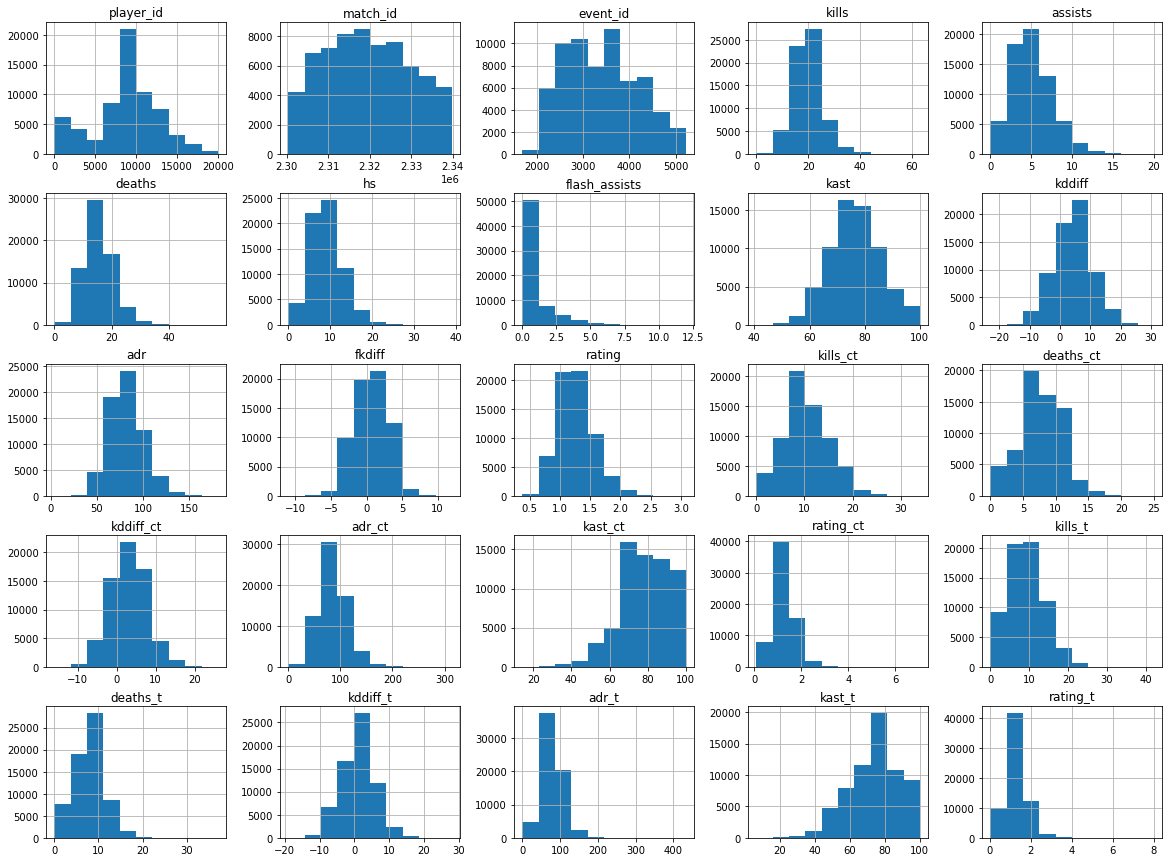

In [11]:
# Histogram for individual win features.
_ = df_individual_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='country', ylabel='count'>

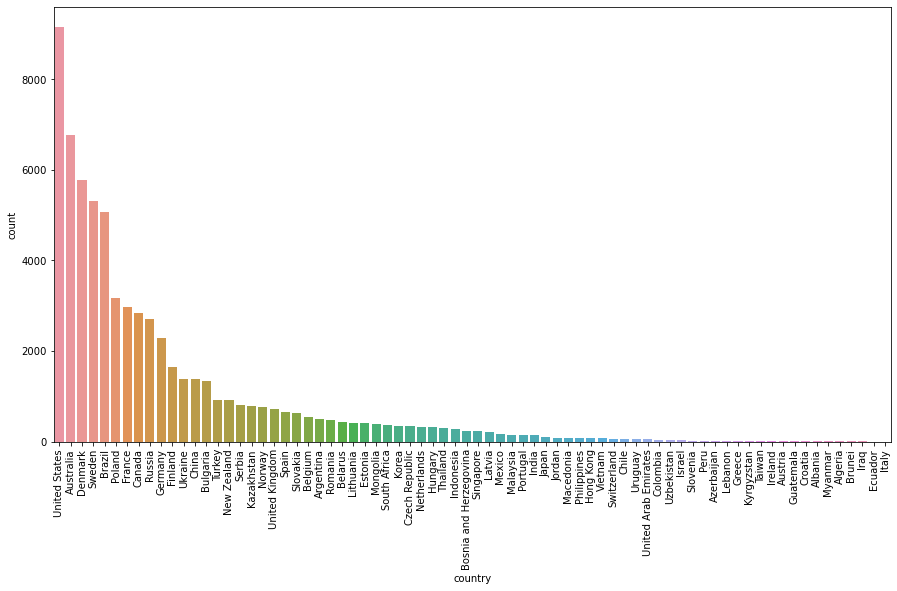

In [12]:
# Create a copy of the individual win dataframe only containing the categorical features.
df_individual_win_cat = df_individual_win.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_individual_win_cat, x = 'country', order = df_individual_win_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

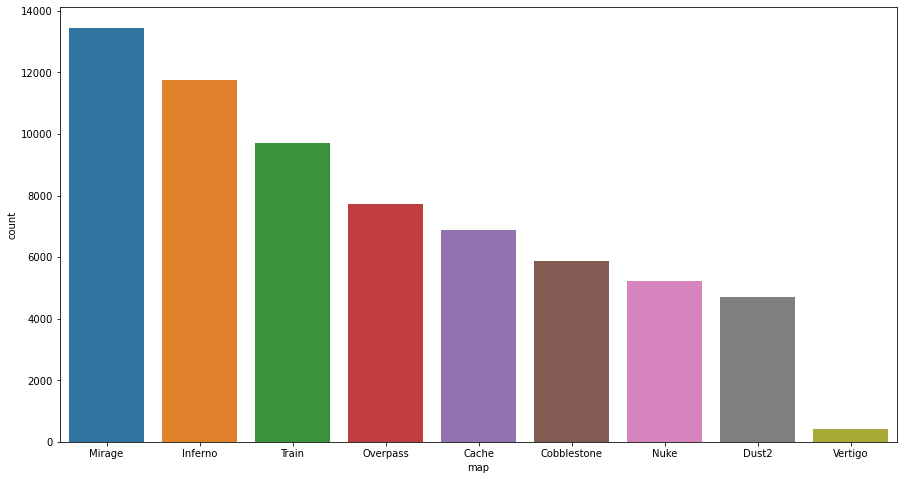

In [13]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_win_cat, x = 'map', order = df_individual_win_cat['map'].value_counts().index)

<AxesSubplot:>

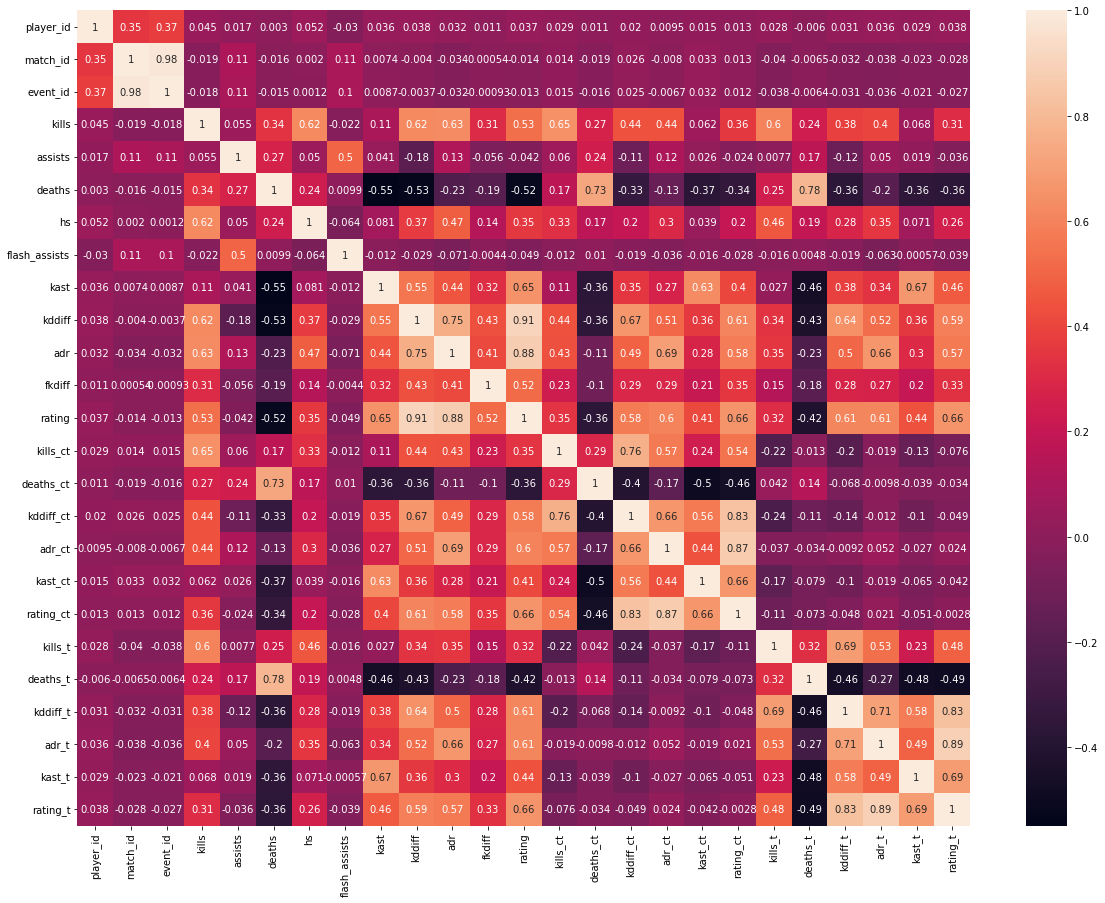

In [14]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_win.corr(), annot = True)

In [15]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Individual Player Performance - Loss

In [16]:
# Summary statistics for losses.
df_individual_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,64798.0,9.272290e+03,4288.708116,2.00,7511.00,9217.00,11941.00,19995.00
match_id,64798.0,2.319658e+06,10329.356033,2300412.00,2311279.00,2319489.00,2327784.00,2339828.00
event_id,64798.0,3.415135e+03,779.548728,1690.00,2767.00,3374.00,3965.00,5224.00
kills,64798.0,1.570829e+01,6.277097,0.00,11.00,15.00,19.00,75.00
assists,64798.0,3.658770e+00,2.316088,0.00,2.00,3.00,5.00,20.00
deaths,64798.0,1.979293e+01,3.334349,1.00,18.00,19.00,21.00,53.00
hs,64798.0,7.240733e+00,3.717869,0.00,5.00,7.00,9.00,38.00
flash_assists,64798.0,8.992099e-01,1.026350,0.00,0.00,1.00,1.00,13.00
kast,64798.0,6.222113e+01,10.480079,15.80,55.60,63.00,69.60,100.00
kddiff,64798.0,-4.084632e+00,5.553786,-26.00,-8.00,-5.00,-1.00,30.00


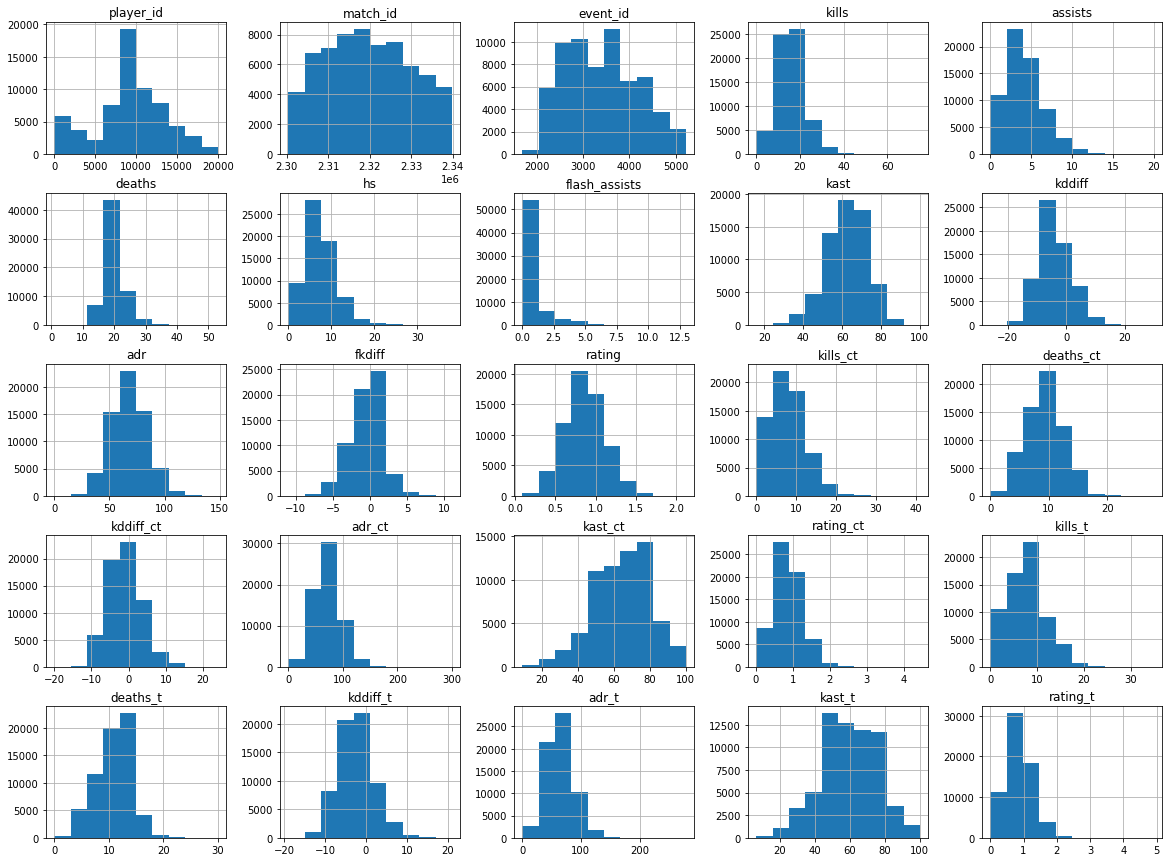

In [17]:
# Histogram for individual loss features.
_ = df_individual_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'country' and 'map'. We are not interested in 'date', 'player_name', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='country', ylabel='count'>

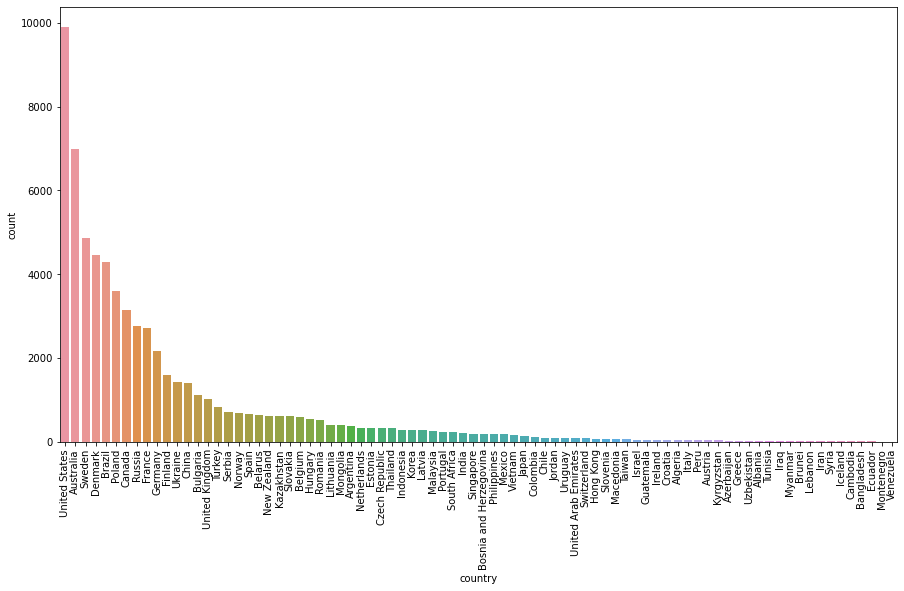

In [18]:
# Create a copy of the individual loss dataframe only containing the categorical features.
df_individual_loss_cat = df_individual_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'country' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_individual_loss_cat, x = 'country', order = df_individual_loss_cat['country'].value_counts().index)

<AxesSubplot:xlabel='map', ylabel='count'>

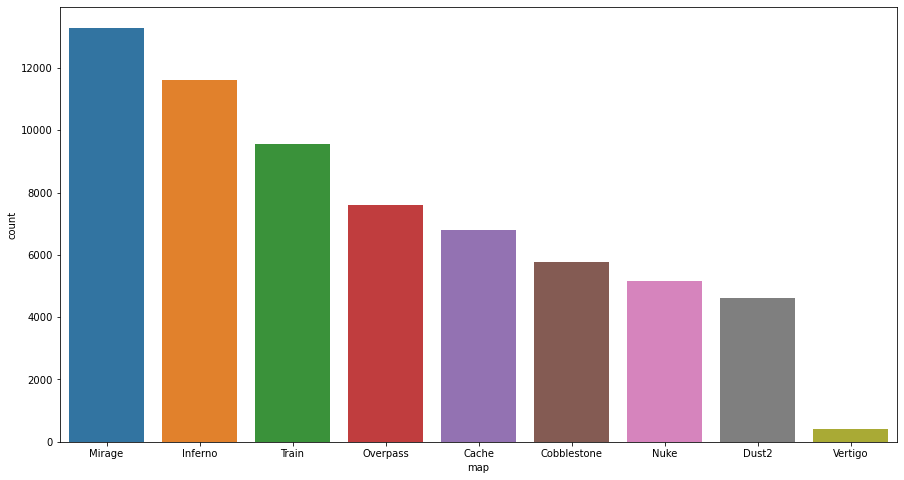

In [19]:
# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(data = df_individual_loss_cat, x = 'map', order = df_individual_loss_cat['map'].value_counts().index)

<AxesSubplot:>

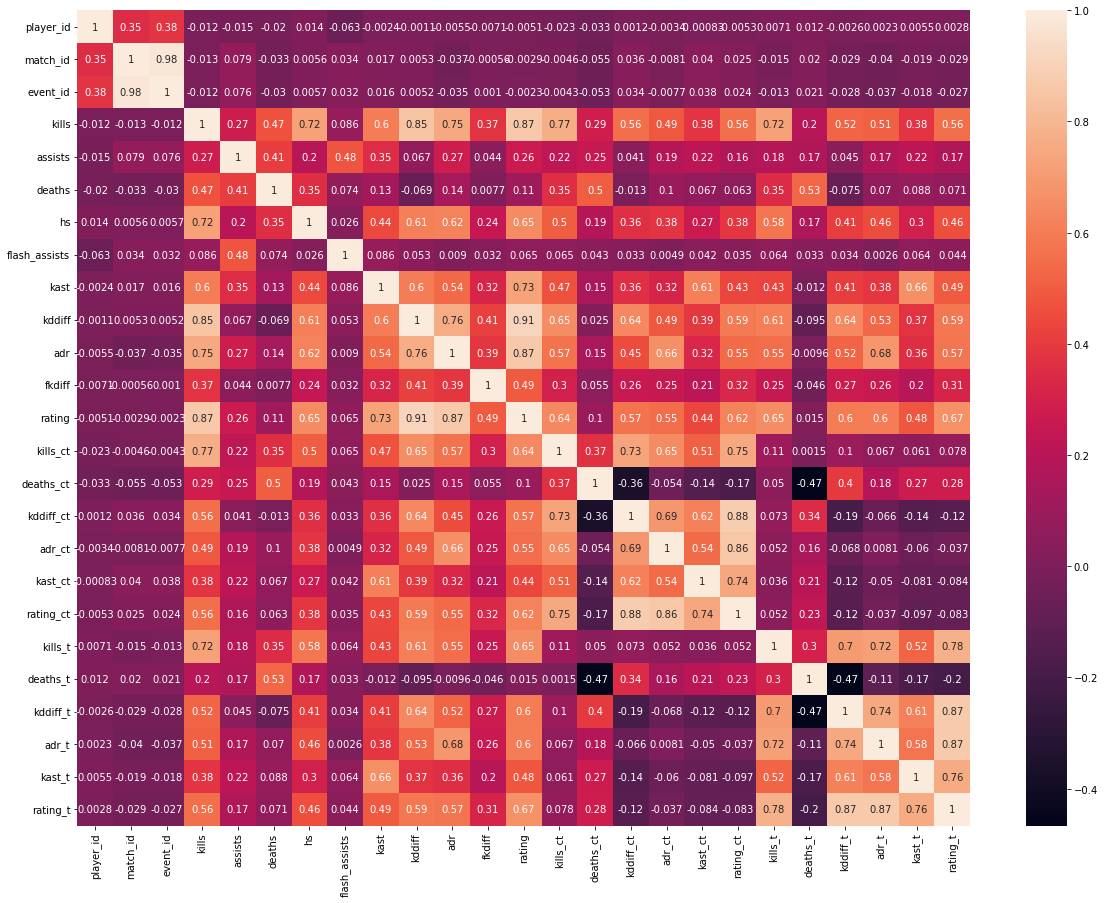

In [20]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual_loss.corr(), annot = True)

In [21]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Individual Player Performance - Boxplot/Countplot Comparisons

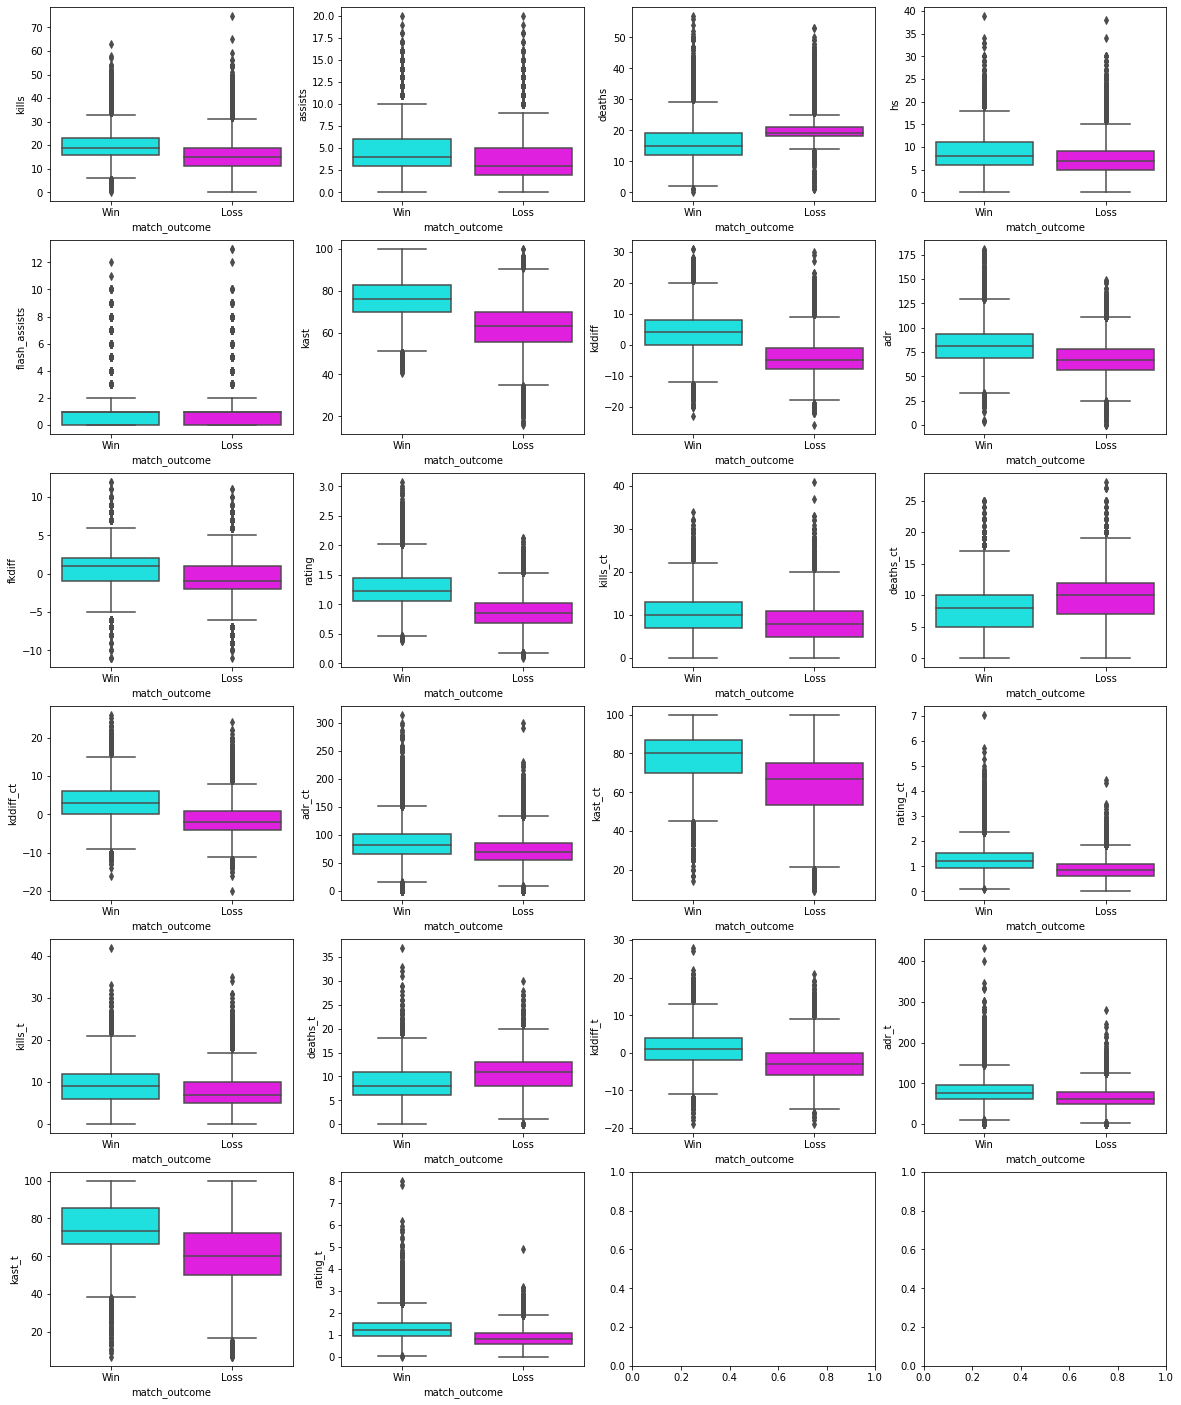

In [22]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(6, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'rating', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'kills_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'deaths_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'kddiff_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'adr_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kast_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'rating_ct', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kills_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'deaths_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kddiff_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[4,3], x = 'match_outcome', y = 'adr_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[5,0], x = 'match_outcome', y = 'kast_t', data = df_individual, palette = colors)
_ = sns.boxplot(ax = ax[5,1], x = 'match_outcome', y = 'rating_t', data = df_individual, palette = colors)

In [23]:
# Make a markdown cell and comment on some of the important information portrayed in the boxplots above. Also mention outliers and if they all make sense. If not, investigate the extreme values.

C:\Users\justi\AppData\Local\Temp/ipykernel_14252/2174944295.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_individual['country'], rotation = 90)


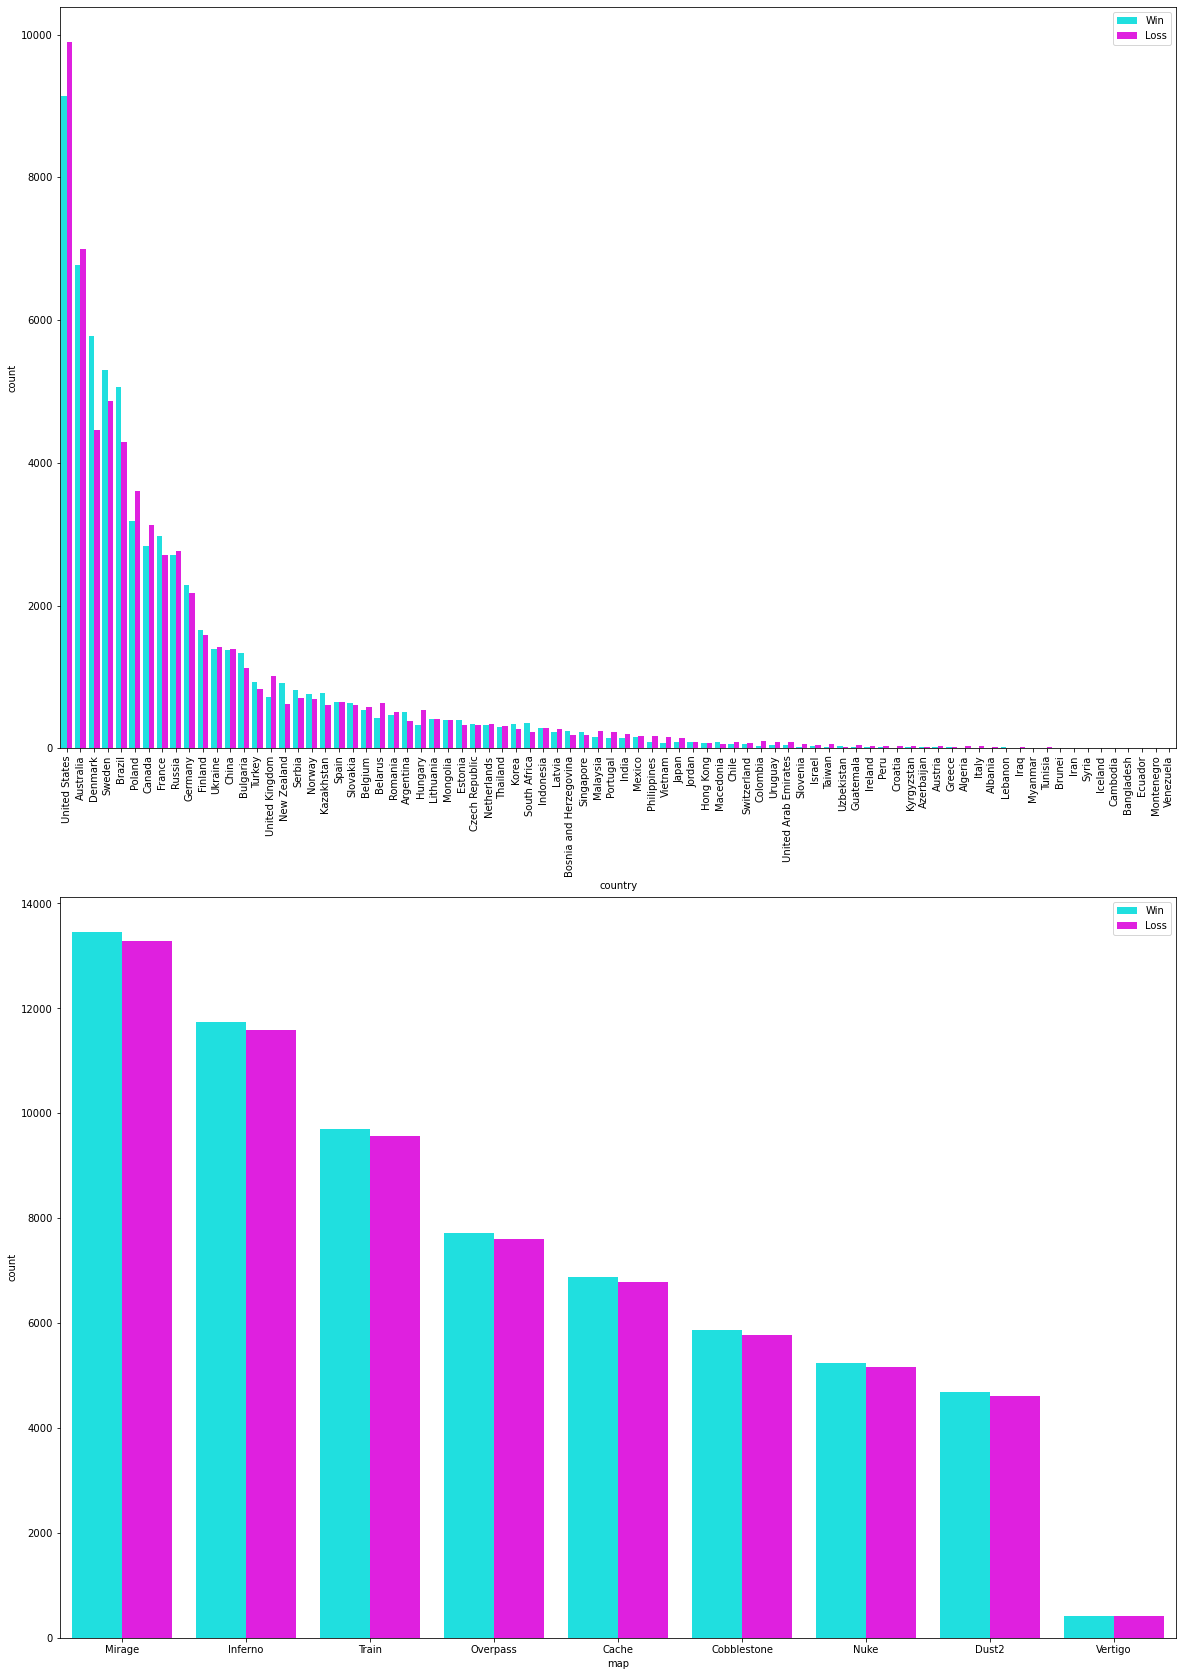

In [24]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(2, 1, figsize = (20,30))

colors = ['cyan', 'magenta']

ax[0].set_xticklabels(df_individual['country'], rotation = 90)
sns.countplot(ax = ax[0], x = 'country', hue = 'match_outcome', data = df_individual, order = df_individual['country'].value_counts().index, palette = colors)
ax[0].legend(loc = 'upper right')

sns.countplot(ax = ax[1], x = 'map', hue = 'match_outcome', data = df_individual, order = df_individual['map'].value_counts().index, palette = colors)
ax[1].legend(loc = 'upper right')

In [25]:
# Create a markdown cell and talk about the country countplot briefly.

We would expect the countplot to show equal map counts for the win and loss data, so we should make a note that there is an unexpected/unexplained difference in map counts.

### Individual Player Performance - Combined Win/Loss Data

In [26]:
# Summary statistics (wins and losses combined).
df_individual.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,130502.0,9.033092e+03,4176.702761,2.00,7433.00,9083.00,11630.00,19995.00
match_id,130502.0,2.319657e+06,10327.619608,2300412.00,2311279.00,2319488.00,2327783.00,2339828.00
event_id,130502.0,3.415114e+03,779.510028,1690.00,2767.00,3374.00,3965.00,5224.00
kills,130502.0,1.772918e+01,6.274175,0.00,13.00,17.00,22.00,75.00
assists,130502.0,4.133753e+00,2.443875,0.00,2.00,4.00,6.00,20.00
deaths,130502.0,1.769030e+01,4.818892,0.00,15.00,18.00,20.00,57.00
hs,130502.0,8.027701e+00,3.868044,0.00,5.00,8.00,10.00,39.00
flash_assists,130502.0,1.013494e+00,1.124346,0.00,0.00,1.00,1.00,13.00
kast,130502.0,6.939720e+01,12.120298,15.80,61.80,70.00,77.80,100.00
kddiff,130502.0,3.888829e-02,7.172407,-26.00,-5.00,0.00,5.00,31.00


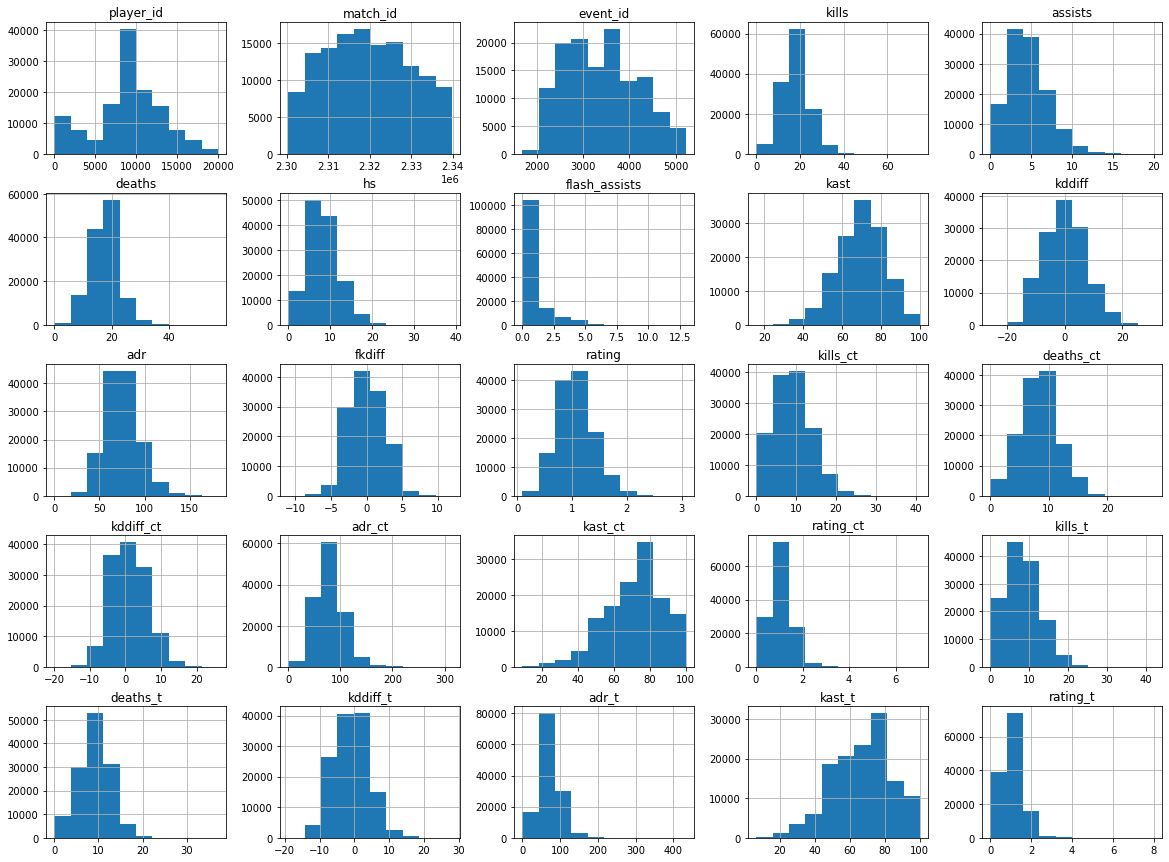

In [27]:
# Histogram for individual features (wins and losses combined).
_ = df_individual.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

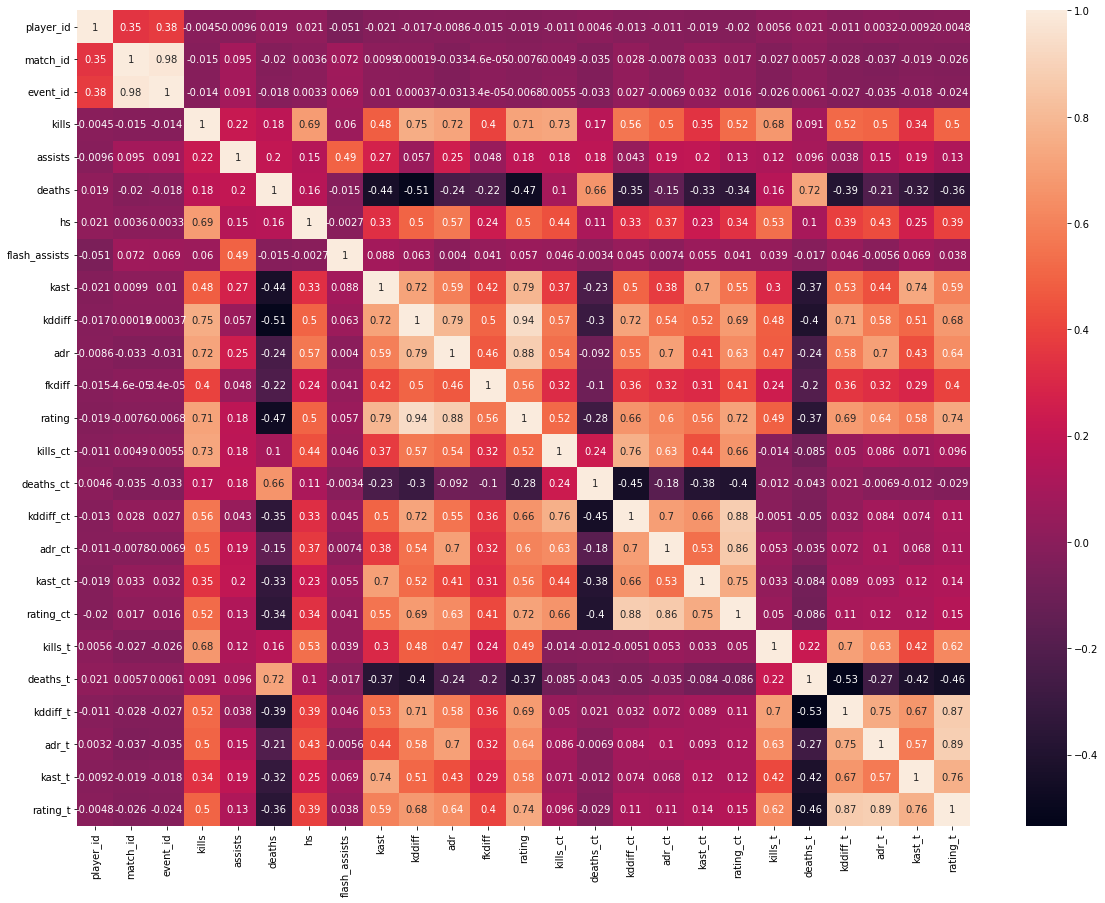

In [28]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_individual.corr(), annot = True)

In [29]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

## Taking a Closer Look at the Team Data

### Team Performance - Win

In [30]:
# Summary statistics for team win features.
df_team_win.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13337.0,2.319425e+06,10486.403220,2299001.000,2.310948e+06,2319395.000,2327738.000,2339828.000
kills,13337.0,1.971268e+01,2.883408,3.800,1.800000e+01,19.400,20.600,49.800
assists,13337.0,4.594047e+00,1.314003,0.600,3.600000e+00,4.400,5.400,12.000
deaths,13337.0,1.561062e+01,4.729261,1.800,1.220000e+01,15.400,18.400,54.000
hs,13337.0,8.793387e+00,1.671542,0.600,7.600000e+00,8.600,9.800,26.800
flash_assists,13337.0,1.124083e+00,0.614087,0.000,8.000000e-01,1.000,1.400,5.000
kast,13337.0,7.638694e+01,6.202710,54.660,7.200000e+01,75.840,80.020,98.760
kddiff,13337.0,4.102062e+00,2.718713,-7.400,2.200000e+00,4.000,6.000,12.200
adr,13337.0,8.168167e+01,6.251331,55.740,7.714000e+01,81.020,85.820,99.960
fkdiff,13337.0,7.024593e-01,0.997116,-3.600,0.000000e+00,0.800,1.400,4.000


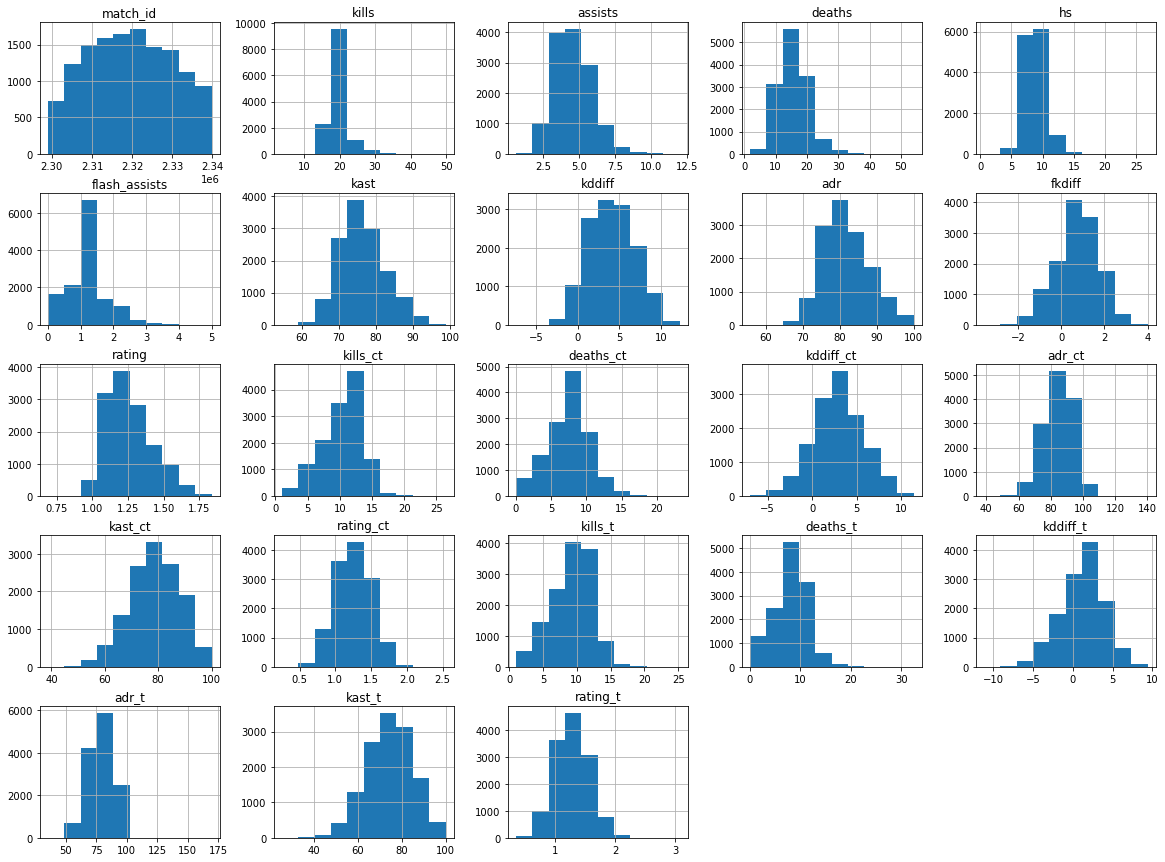

In [31]:
# Histogram for team win features.
_ = df_team_win.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

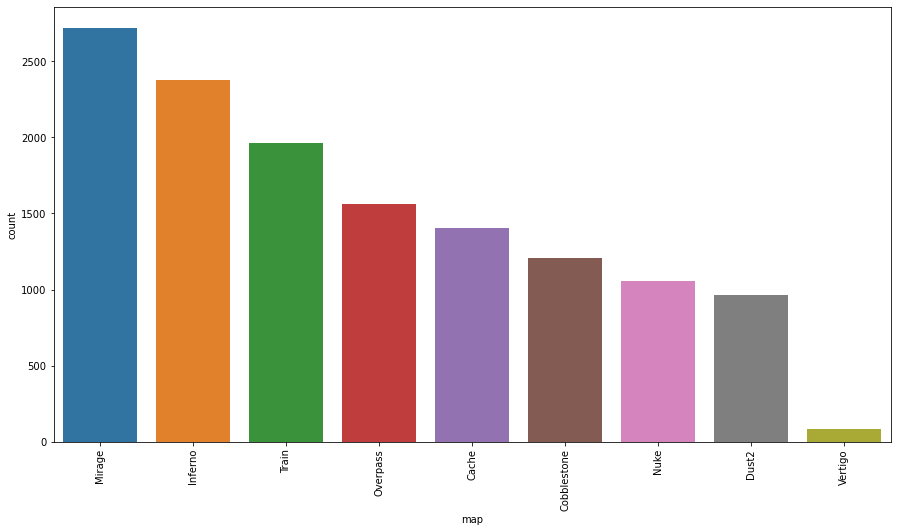

In [32]:
# Create a copy of the team win dataframe only containing the categorical features.
df_team_win_cat = df_team_win.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_win_cat, x = 'map', order = df_team_win_cat['map'].value_counts().index)

<AxesSubplot:>

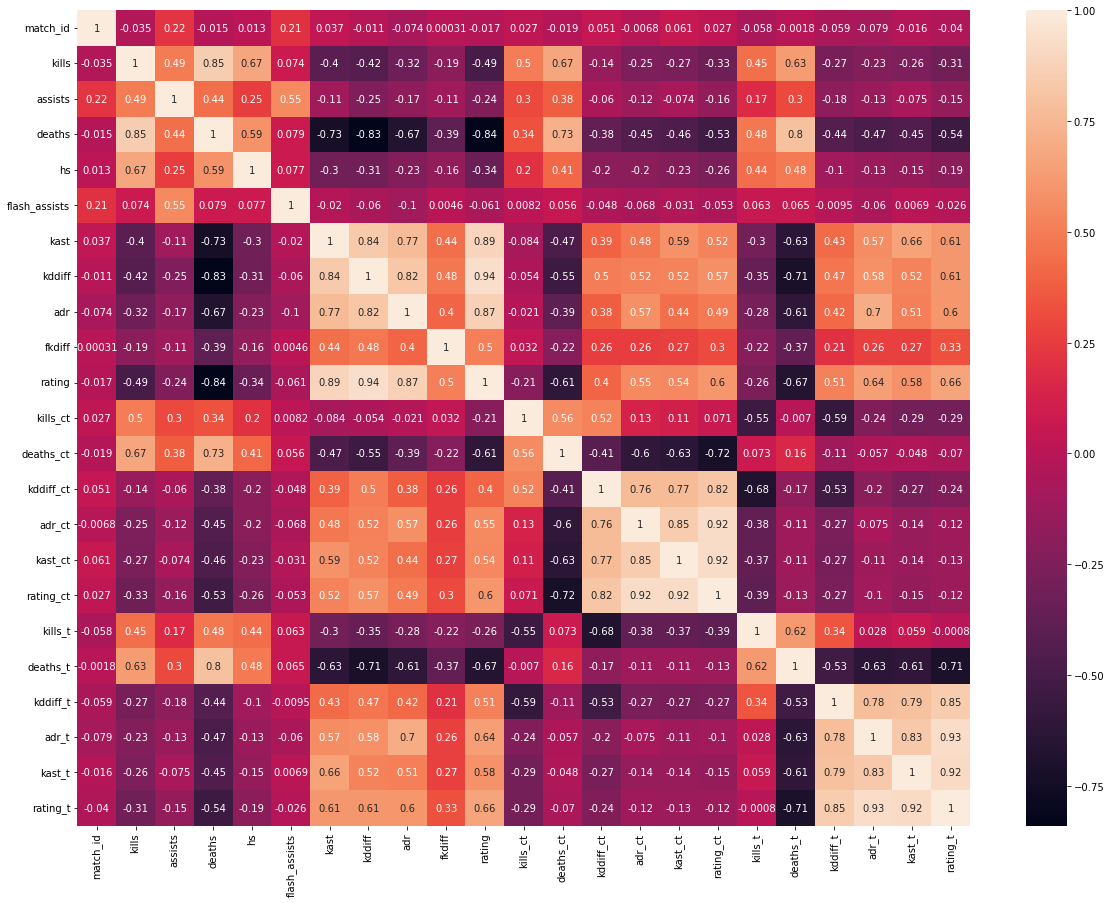

In [33]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_win.corr(), annot = True)

In [34]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Team Performance - Loss

In [35]:
# Summary statistics for team loss features.
df_team_loss.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,13336.0,2.319426e+06,10486.715680,2299001.000,2310947.750,2319395.500,2.327739e+06,2339828.000
kills,13336.0,1.557370e+01,4.724566,1.800,12.200,15.400,1.840000e+01,54.000
assists,13336.0,3.624295e+00,1.445996,0.200,2.600,3.400,4.400000e+00,13.400
deaths,13336.0,1.973799e+01,2.894245,3.800,18.000,19.400,2.060000e+01,49.800
hs,13336.0,7.174955e+00,2.190693,0.600,5.600,7.000,8.400000e+00,23.200
flash_assists,13336.0,8.963257e-01,0.552134,0.000,0.600,1.000,1.000000e+00,5.800
kast,13336.0,6.203210e+01,7.398231,30.000,57.600,63.000,6.744000e+01,84.760
kddiff,13336.0,-4.164292e+00,2.713745,-12.200,-6.000,-4.000,-2.200000e+00,7.400
adr,13336.0,6.748852e+01,6.807381,31.860,63.600,68.500,7.236000e+01,87.580
fkdiff,13336.0,-7.092981e-01,0.996834,-4.000,-1.400,-0.800,0.000000e+00,3.600


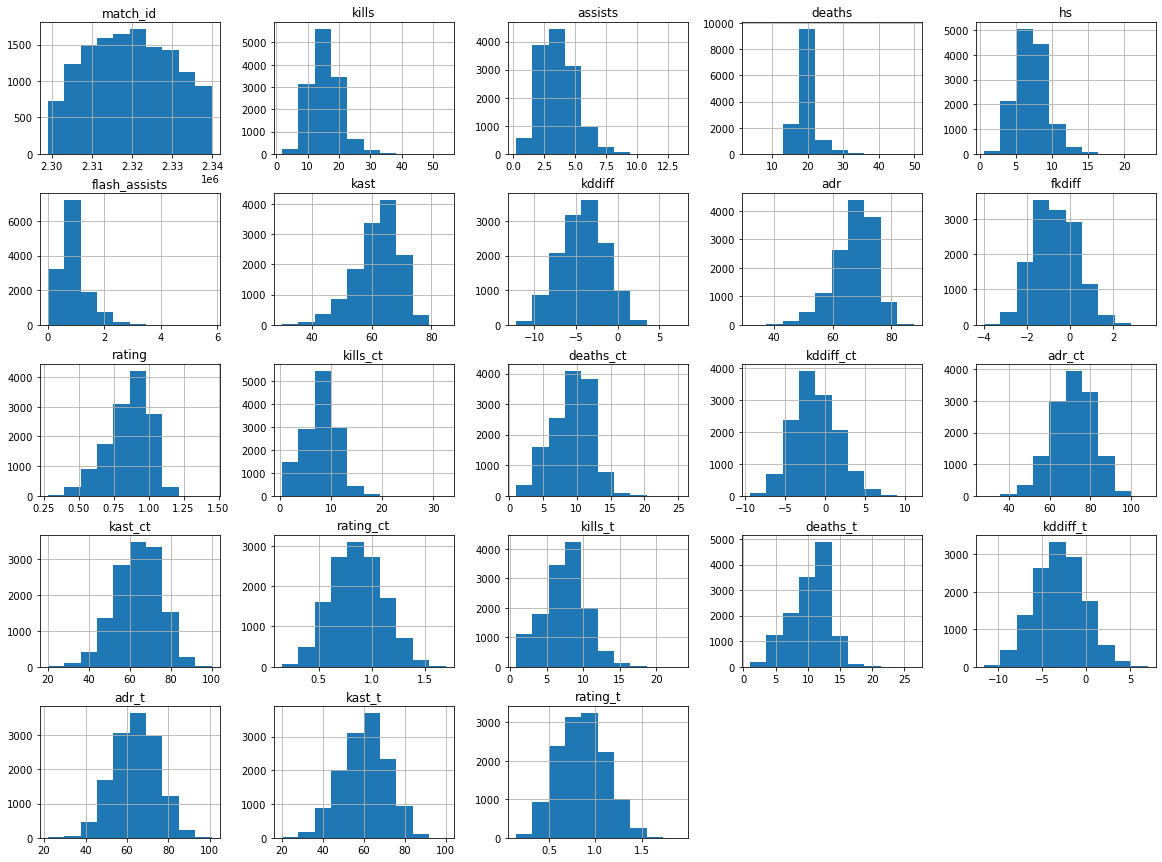

In [36]:
# Histogram for team loss features.
_ = df_team_loss.hist(bins = 10, figsize = (20,15))

Now we want to look closer at some of the categorical features in our data. We'll look at 'map'. We are not interested in 'date', 'team', 'opponent', 'event_name', or 'match_outcome'. **Note:** While 'team' and 'opponent' likely impact the outcome of a match, we are not interested in how strength level of teams/opponents impact match outcomes, but rather just the match statistics.

<AxesSubplot:xlabel='map', ylabel='count'>

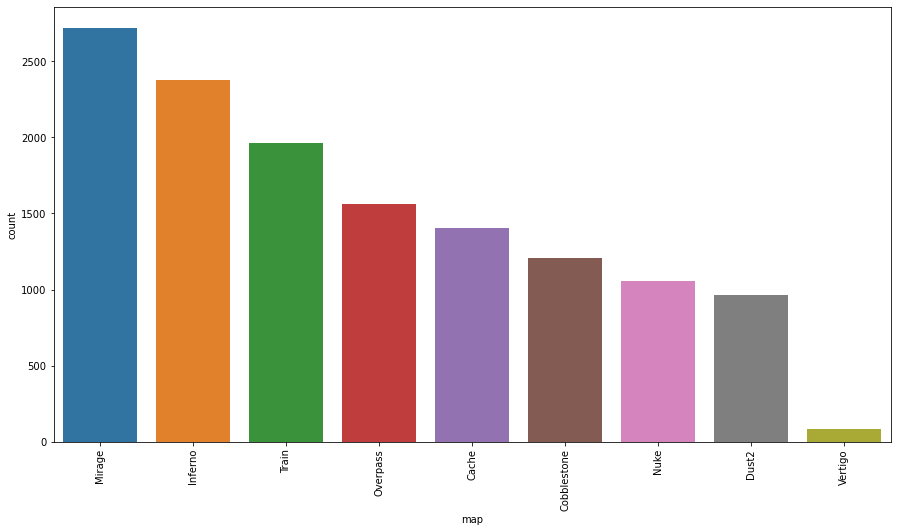

In [37]:
# Create a copy of the team loss dataframe only containing the categorical features.
df_team_loss_cat = df_team_loss.select_dtypes(include = 'object').copy()

# Countplot for the 'map' feature.
fig, ax = plt.subplots(figsize = (15,8))
plt.xticks(rotation = 90)
sns.countplot(data = df_team_loss_cat, x = 'map', order = df_team_loss_cat['map'].value_counts().index)

<AxesSubplot:>

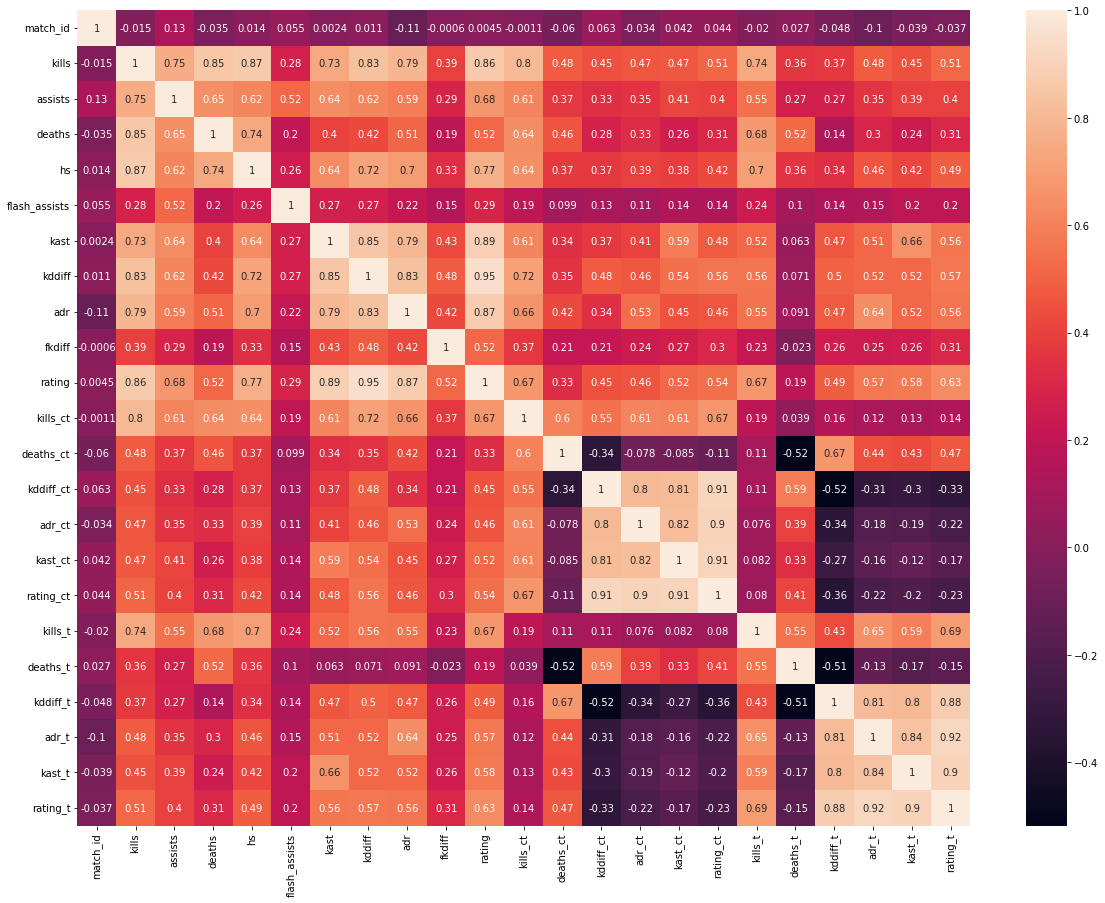

In [38]:
# Correlation heatmap
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team_loss.corr(), annot = True)

In [39]:
# Create scatterplots to take a closer look at any relationship that may be of interest.

### Team Performance - Boxplot/Countplot Comparisons

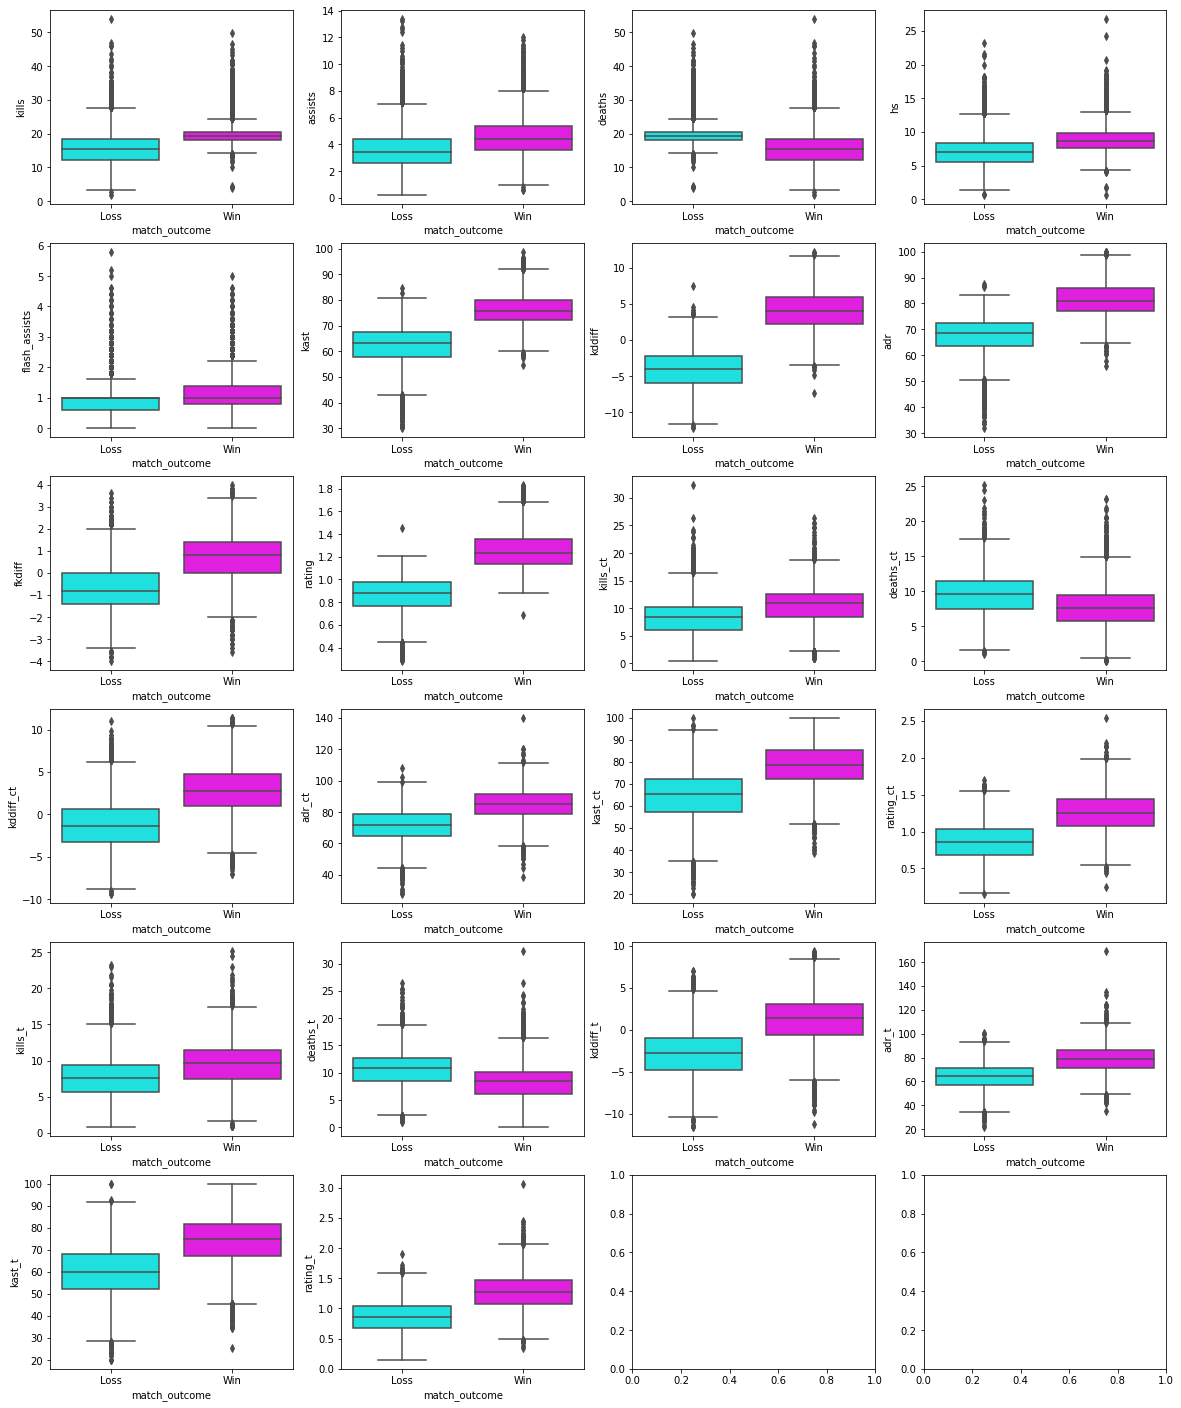

In [40]:
# Side-by-side boxplots by 'match_outcome' (numerical feature comparisons).
fig, ax = plt.subplots(6, 4, figsize = (20,25))

colors = ['cyan', 'magenta']
_ = sns.boxplot(ax = ax[0,0], x = 'match_outcome', y = 'kills', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,1], x = 'match_outcome', y = 'assists', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,2], x = 'match_outcome', y = 'deaths', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[0,3], x = 'match_outcome', y = 'hs', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,0], x = 'match_outcome', y = 'flash_assists', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,1], x = 'match_outcome', y = 'kast', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,2], x = 'match_outcome', y = 'kddiff', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[1,3], x = 'match_outcome', y = 'adr', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,0], x = 'match_outcome', y = 'fkdiff', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,1], x = 'match_outcome', y = 'rating', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,2], x = 'match_outcome', y = 'kills_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[2,3], x = 'match_outcome', y = 'deaths_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,0], x = 'match_outcome', y = 'kddiff_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,1], x = 'match_outcome', y = 'adr_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,2], x = 'match_outcome', y = 'kast_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[3,3], x = 'match_outcome', y = 'rating_ct', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,0], x = 'match_outcome', y = 'kills_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,1], x = 'match_outcome', y = 'deaths_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,2], x = 'match_outcome', y = 'kddiff_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[4,3], x = 'match_outcome', y = 'adr_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[5,0], x = 'match_outcome', y = 'kast_t', data = df_team, palette = colors)
_ = sns.boxplot(ax = ax[5,1], x = 'match_outcome', y = 'rating_t', data = df_team, palette = colors)

In [41]:
# Make a markdown cell and comment on some of the important information portrayed in the boxplots above. Also mention outliers and if they all make sense. If not, investigate the extreme values.

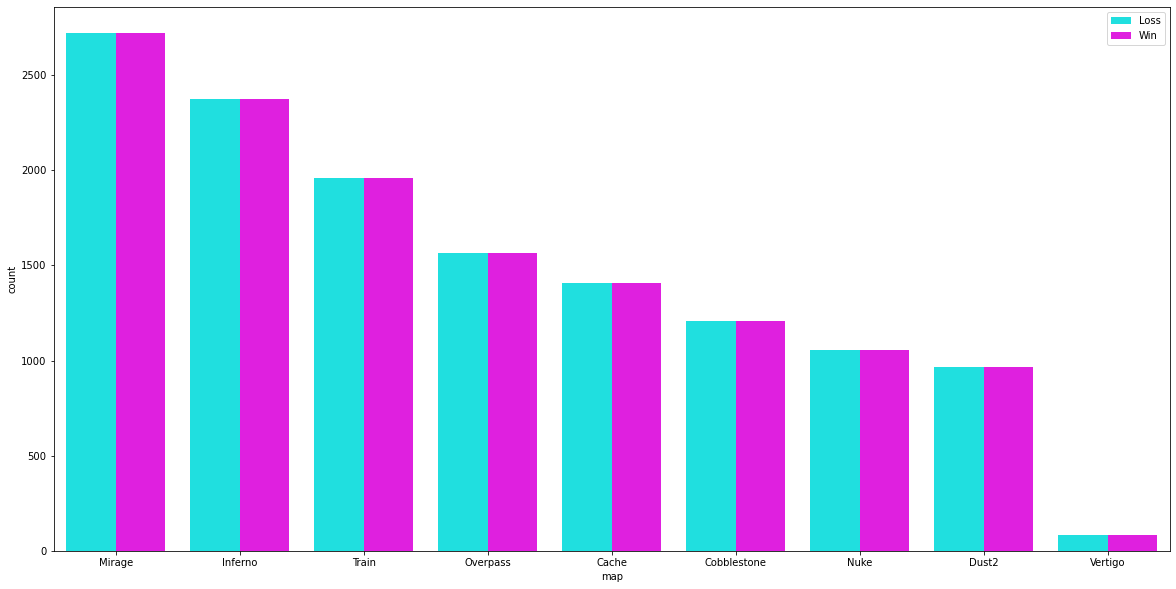

In [42]:
# Side-by-side countplots by 'match_outcome' (categorical feature comparisons).
fig, ax = plt.subplots(figsize = (20,10))

colors = ['cyan', 'magenta']

sns.countplot(x = 'map', hue = 'match_outcome', data = df_team, order = df_team['map'].value_counts().index, palette = colors)
plt.legend(loc = 'upper right')

The countplot is what we expect: The map counts for the win data are the same as the loss data. Since during the data wrangling stage we aggregated over the teams and match_ids, this can explain why we do not see the minor difference that we saw in the earlier, individual comparison.

### Team Performance - Combined Win/Loss Data

In [43]:
# Summary statistics (wins and losses combined).
df_team.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,26673.0,2.319426e+06,10486.362861,2299001.000,2310948.000,2.319395e+06,2327738.000,2339828.000
kills,26673.0,1.764327e+01,4.427177,1.800,15.400,1.820000e+01,20.000,54.000
assists,26673.0,4.109189e+00,1.464168,0.200,3.000,4.000000e+00,5.000,13.400
deaths,26673.0,1.767423e+01,4.430568,1.800,15.400,1.820000e+01,20.000,54.000
hs,26673.0,7.984201e+00,2.109803,0.600,6.600,8.000000e+00,9.200,26.800
flash_assists,26673.0,1.010209e+00,0.594924,0.000,0.600,1.000000e+00,1.200,5.800
kast,26673.0,6.920979e+01,9.905501,30.000,62.980,6.958000e+01,76.000,98.760
kddiff,26673.0,-3.096015e-02,4.945849,-12.200,-4.000,0.000000e+00,4.000,12.200
adr,26673.0,7.458536e+01,9.647348,31.860,68.400,7.462000e+01,81.060,99.960
fkdiff,26673.0,-3.392944e-03,1.221559,-4.000,-0.800,0.000000e+00,0.800,4.000


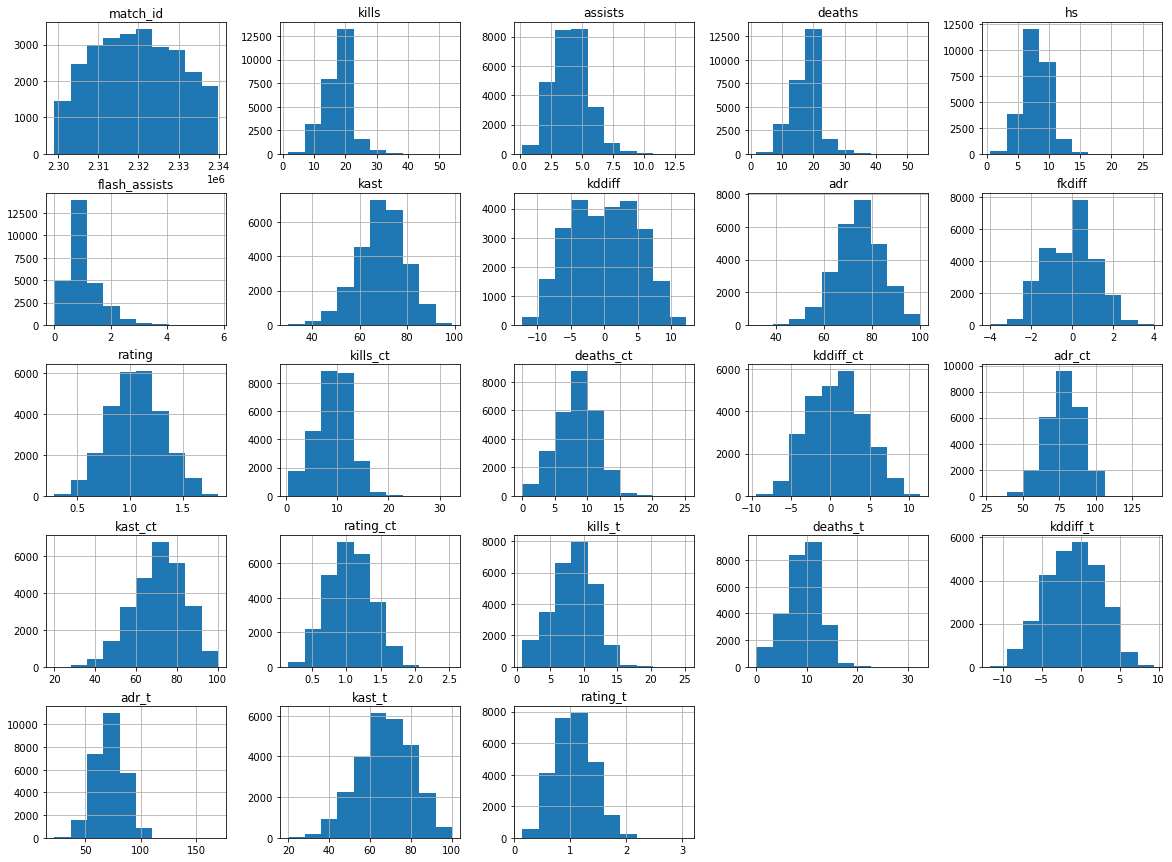

In [44]:
# Histogram for team features (wins and losses combined).
_ = df_team.hist(bins = 10, figsize = (20,15))

<AxesSubplot:>

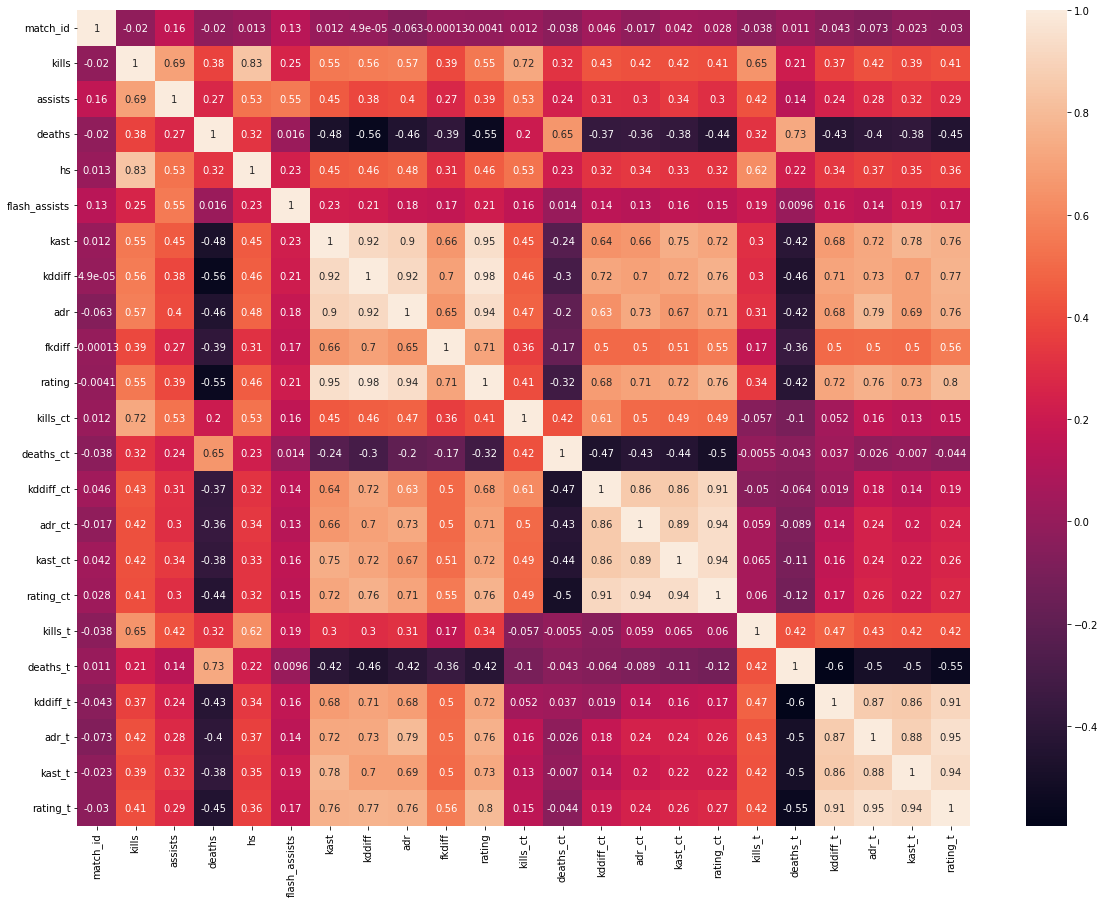

In [45]:
# Correlation heatmap (wins and losses combined).
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(df_team.corr(), annot = True)

In [46]:
# Create scatterplots to take a closer look at any relationship that may be of interest.